In [1]:
import pandas as pd
import numpy as np


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt
import seaborn as snb

In [11]:
data = pd.read_csv("fake_job_postings.csv")

In [12]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [15]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [16]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [17]:
data.drop(['job_id','salary_range','telecommuting','has_company_logo','has_questions'],axis=1,inplace=True)

In [18]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [19]:
labels="Fake","Real"

In [26]:
sizes = [
    data["function"][data["fraudulent"] == 1].count(),
    data["function"][data["fraudulent"] == 0].count()
]
explode=[0,0.1]


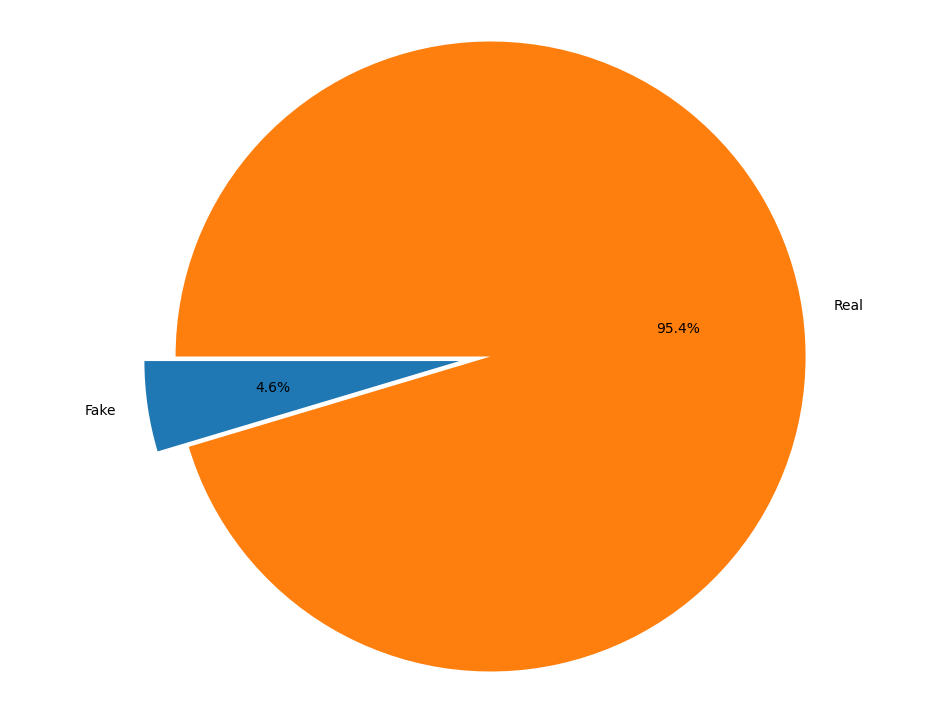

In [28]:
fig1, ax1 = plt.subplots(figsize=(12, 9))
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%.1f%%',   # correct percentage format
    startangle=180
)
ax1.axis('equal')  # optional: makes the pie chart a circle
plt.show()


In [31]:
import pandas as pd

data = pd.DataFrame({
    'country': ['USA', 'India', 'USA', 'UK', 'France', 'India', None]
})

print(data['country'].nunique())


4


In [32]:
data['country'].nunique()

4

In [33]:
data['country'].value_counts()[:11]

country
USA       2
India     2
UK        1
France    1
Name: count, dtype: int64

In [34]:
country=dict(data.country.value_counts()[:11])

Text(0, 0.5, 'Number of Jobs')

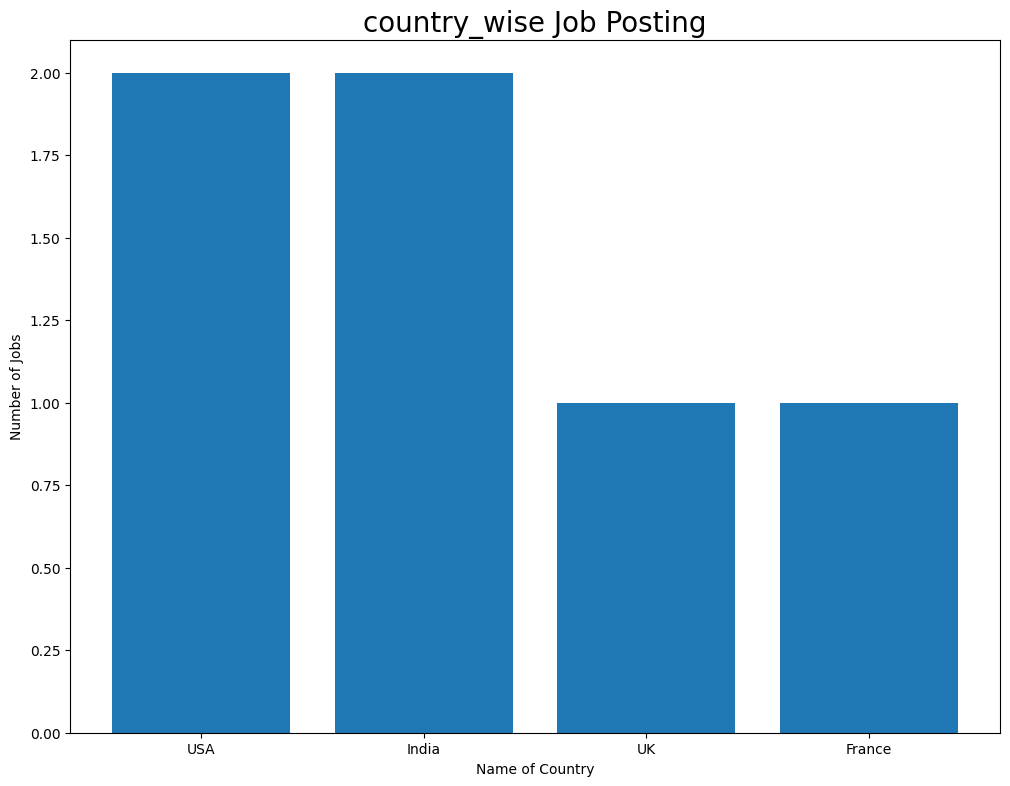

In [41]:
country=dict(data.country.value_counts()[:11])

plt.figure(figsize=(12,9))
plt.title('country_wise Job Posting',size=20)
plt.bar(country.keys(),country.values())

plt.xlabel('Name of Country')
plt.ylabel('Number of Jobs')

In [48]:
data.columns = data.columns.str.strip()


In [50]:
print(data.columns.tolist())



['country']


In [51]:
['Department', 'Job Title', 'Location', ...]


['Department', 'Job Title', 'Location', Ellipsis]

In [95]:
import pandas as pd

data = pd.DataFrame({
    'department': [
        'Engineering', 'Marketing', 'Engineering', 'Sales', 
        'HR', 'Marketing', 'Finance', 'Sales', None, 'HR'
    ]
})

print("Unique departments count:", data['department'].nunique())
print("Unique departments:", data['department'].unique())



Unique departments count: 5
Unique departments: ['Engineering' 'Marketing' 'Sales' 'HR' 'Finance' None]


In [97]:
department1=dict(data.department.value_counts()[:11])

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

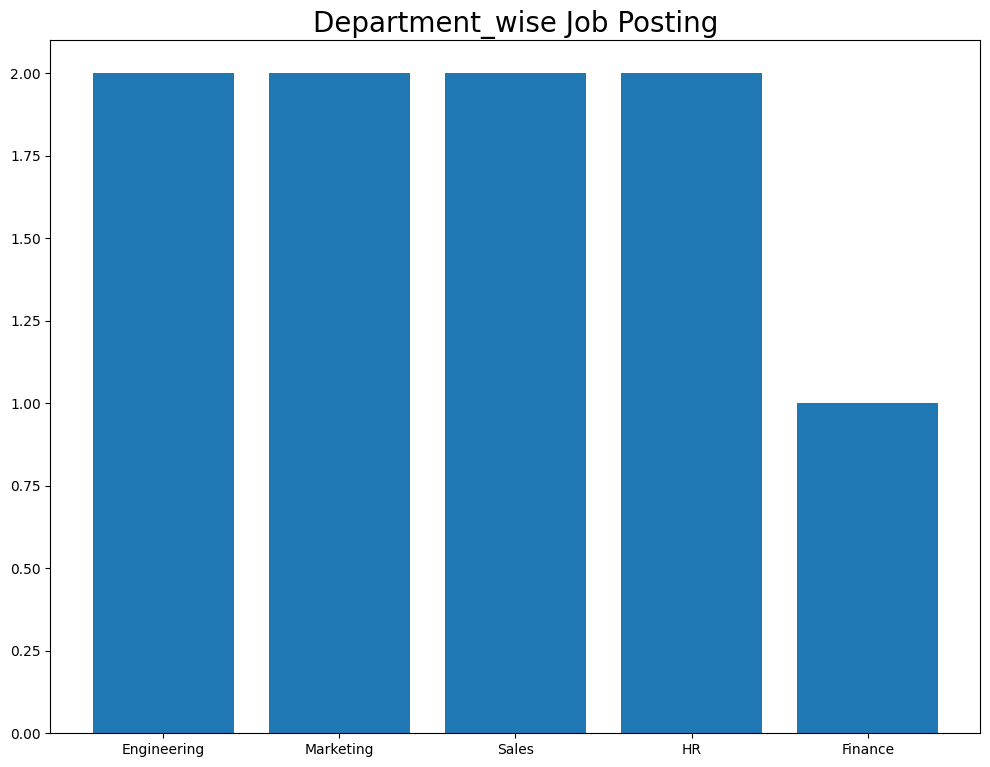

In [99]:
# Visualize Job Posting by Depatment
department1=dict(data.department.value_counts()[:11])

plt.figure(figsize=(12,9))

plt.title('Department_wise Job Posting',size=20)
plt.bar(department1.keys(), department1.values())


plt.xlable('Department')
plt.ylabel('Number of Jobs')
plt.show()



In [102]:
import pandas as pd

data = pd.DataFrame({
    'title': [
        'Software Engineer', 'Data Scientist', 'Software Engineer', 
        'Project Manager', 'Business Analyst', 'Data Scientist', 
        'Product Manager', 'Project Manager', None, 'HR Specialist'
    ]
})

print("Unique job titles count:", data['title'].nunique())
print("Unique job titles:", data['title'].unique())


Unique job titles count: 6
Unique job titles: ['Software Engineer' 'Data Scientist' 'Project Manager' 'Business Analyst'
 'Product Manager' None 'HR Specialist']


In [103]:
# To find the fake job titles
data.title.value_counts()[:11]


title
Software Engineer    2
Data Scientist       2
Project Manager      2
Business Analyst     1
Product Manager      1
HR Specialist        1
Name: count, dtype: int64

In [106]:
import pandas as pd

data = pd.DataFrame({
    'title': [
        'Software Engineer', 'Data Scientist', 'Project Manager', 
        'HR Specialist', 'Product Manager', 'Data Scientist', 
        'Software Engineer', 'Sales Executive', 'HR Specialist', 'Accountant'
    ],
    'fraudlent': [0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
})

print(data)


               title  fraudlent
0  Software Engineer          0
1     Data Scientist          1
2    Project Manager          0
3      HR Specialist          1
4    Product Manager          0
5     Data Scientist          1
6  Software Engineer          0
7    Sales Executive          0
8      HR Specialist          1
9         Accountant          0


In [107]:
data[data.fraudlent==1].title.value_counts()[:11]

title
Data Scientist    2
HR Specialist     2
Name: count, dtype: int64

In [108]:
data[data.fraudlent==0].title.value_counts()[:11]

title
Software Engineer    2
Project Manager      1
Product Manager      1
Sales Executive      1
Accountant           1
Name: count, dtype: int64

In [112]:
data.columns

Index(['title', 'fraudlent'], dtype='object')

In [113]:
data

,title,fraudlent
0,Software Engineer,0
1,Data Scientist,1
2,Project Manager,0
3,HR Specialist,1
4,Product Manager,0
5,Data Scientist,1
6,Software Engineer,0
7,Sales Executive,0
8,HR Specialist,1
9,Accountant,0


In [126]:
import pandas as pd

data = pd.DataFrame({
    'title': [
        'Software Engineer', 'Data Scientist', 'Project Manager',
        'HR Specialist', 'Product Manager'
    ],
    'location': [
        'New York', 'San Francisco', 'Chicago',
        'Boston', 'Seattle'
    ],
    'department': [
        'Engineering', 'Data Science', 'Management',
        'Human Resources', 'Product'
    ],
    'company_profile': [
        'Tech startup focused on AI', 'Global financial services firm',
        'Leading healthcare provider', 'Non-profit organization',
        'E-commerce giant'
    ],
    'description': [
        'Develop and maintain software applications.',
        'Analyze large datasets to gain insights.',
        'Manage project timelines and deliverables.',
        'Support employee relations and recruitment.',
        'Lead product development teams.'
    ]
})

# Combine into 'text' column
data['text'] = (
    data['title'] + ' ' +
    data['location'] + ' ' +
    data['department'] + ' ' +
    data['company_profile'] + ' ' +
    data['description'])

print(data[['text']])


                                                text
0  Software Engineer New York Engineering Tech st...
1  Data Scientist San Francisco Data Science Glob...
2  Project Manager Chicago Management Leading hea...
3  HR Specialist Boston Human Resources Non-profi...
4  Product Manager Seattle Product E-commerce gia...


In [127]:
data['text'] = data['title'] + ' ' + data['location'] + ' ' + data['department'] + ' ' + data['company_profile'] + ' ' + data['description']
del data['title']
del data['location']



In [129]:
print(data.columns.tolist())


['department', 'company_profile', 'description', 'text']


In [130]:
for col in ['title', 'location', 'department', 'company_profile', 'description']:
    if col in data.columns:
        data[col] = data[col].fillna('')


In [132]:
data['department']


0        Engineering
1       Data Science
2         Management
3    Human Resources
4            Product
Name: department, dtype: object

In [133]:
# List all columns to combine
cols = ['title', 'location', 'department', 'company_profile', 'description']

# Fill NaNs or add empty strings if column missing
for col in cols:
    if col in data.columns:
        data[col] = data[col].fillna('')
    else:
        # Create missing columns as empty strings so concatenation works
        data[col] = ''

# Now combine safely
data['text'] = data[cols].agg(' '.join, axis=1)

# Delete 'title' and 'location' columns if they exist
for col in ['title', 'location']:
    if col in data.columns:
        del data[col]

print(data.head())


        department                 company_profile  \
0      Engineering      Tech startup focused on AI   
1     Data Science  Global financial services firm   
2       Management     Leading healthcare provider   
3  Human Resources         Non-profit organization   
4          Product                E-commerce giant   

                                   description  \
0  Develop and maintain software applications.   
1     Analyze large datasets to gain insights.   
2   Manage project timelines and deliverables.   
3  Support employee relations and recruitment.   
4              Lead product development teams.   

                                                text  
0    Engineering Tech startup focused on AI Devel...  
1    Data Science Global financial services firm ...  
2    Management Leading healthcare provider Manag...  
3    Human Resources Non-profit organization Supp...  
4    Product E-commerce giant Lead product develo...  


In [134]:
data.head()

,department,company_profile,description,text
0,Engineering,Tech startup focused on AI,Develop and maintain software applications.,Engineering Tech startup focused on AI Devel...
1,Data Science,Global financial services firm,Analyze large datasets to gain insights.,Data Science Global financial services firm ...
2,Management,Leading healthcare provider,Manage project timelines and deliverables.,Management Leading healthcare provider Manag...
3,Human Resources,Non-profit organization,Support employee relations and recruitment.,Human Resources Non-profit organization Supp...
4,Product,E-commerce giant,Lead product development teams.,Product E-commerce giant Lead product develo...


In [136]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [138]:
#check the frequrency of word in dataset
from wordcloud import WordCloud
all_words = ' '.join([text for text in data['text']])


In [139]:
wordcloud=WordCloud(width=600,height=300,max_font_size=120).generate(all_words)

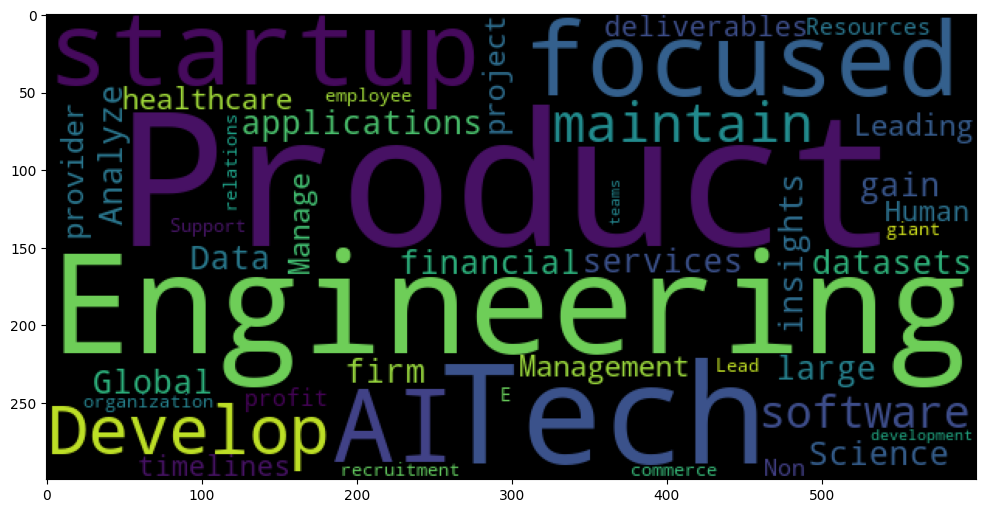

In [140]:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.show()

In [151]:
import pandas as pd

data = pd.DataFrame({
    'title': [
        'Software Engineer', 'Data Scientist', 'Project Manager',
        'HR Specialist', 'Product Manager', 'Sales Executive', 'Accountant'
    ],
    'location': [
        'New York', 'San Francisco', 'Chicago',
        'Boston', 'Seattle', 'Austin', 'Denver'
    ],
    'department': [
        'Engineering', 'Data Science', 'Management',
        'Human Resources', 'Product', 'Sales', 'Finance'
    ],
    'company_profile': [
        'Tech startup focused on AI', 'Global financial services firm',
        'Leading healthcare provider', 'Non-profit organization',
        'E-commerce giant', 'Retail company', 'Accounting firm'
    ],
    'description': [
        'Develop and maintain software applications.',
        'Analyze large datasets to gain insights.',
        'Manage project timelines and deliverables.',
        'Support employee relations and recruitment.',
        'Lead product development teams.',
        'Drive sales strategies and customer acquisition.',
        'Manage financial records and audits.'
    ],
    'fraudlent': [0, 1, 0, 1, 0, 1, 0]  # 1 means fraudulent, 0 means legitimate
})

print(data)


               title       location       department  \
0  Software Engineer       New York      Engineering   
1     Data Scientist  San Francisco     Data Science   
2    Project Manager        Chicago       Management   
3      HR Specialist         Boston  Human Resources   
4    Product Manager        Seattle          Product   
5    Sales Executive         Austin            Sales   
6         Accountant         Denver          Finance   

                  company_profile  \
0      Tech startup focused on AI   
1  Global financial services firm   
2     Leading healthcare provider   
3         Non-profit organization   
4                E-commerce giant   
5                  Retail company   
6                 Accounting firm   

                                        description  fraudlent  
0       Develop and maintain software applications.          0  
1          Analyze large datasets to gain insights.          1  
2        Manage project timelines and deliverables.        

In [152]:
print(data.columns)


Index(['title', 'location', 'department', 'company_profile', 'description',
       'fraudlent'],
      dtype='object')


In [157]:
if 'fraudlent' in data.columns and 'text' in data.columns:
    real_post = ' '.join(data.loc[(data['fraudlent'] == 0) & data['text'].notna(), 'text'].astype(str))
    print(real_post[:500])
else:
    print("Check if 'fraudlent' and 'text' columns exist in your DataFrame")


Check if 'fraudlent' and 'text' columns exist in your DataFrame


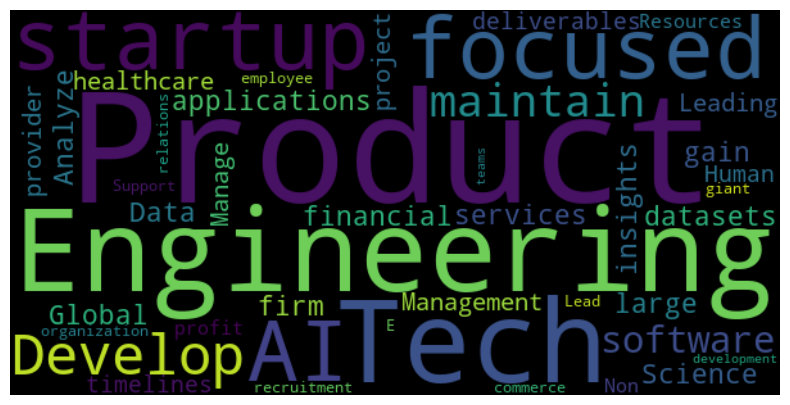

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [168]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [regex]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   ----

In [169]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\delll\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [172]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [173]:
stop_words=set(stopwords.words("english"))

In [181]:
import pandas as pd

# Sample data with some missing values in 'text'
data = pd.DataFrame({
    'text': [
        'This is a Sample TEXT.',
        'ANOTHER Example!',
        None,
        'Text with MIXED case',
        ''
    ]
})

# Convert text to lowercase safely (handle None / NaN)
data['text'] = data['text'].apply(lambda x: x.lower() if isinstance(x, str) else '')

print(data)



                     text
0  this is a sample text.
1        another example!
2                        
3    text with mixed case
4                        


In [182]:
data['text'] = data['text'].apply(lambda x: x.lower() )


In [183]:
data['text']=data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in(stop_words)]))

In [184]:
data['text'][0]

'sample text.'

In [191]:
import pandas as pd

data = pd.DataFrame({
    'title': [
        'Software Engineer', 'Data Scientist', 'Project Manager',
        'HR Specialist', 'Product Manager', 'Sales Executive', 'Accountant'
    ],
    'location': [
        'New York', 'San Francisco', 'Chicago',
        'Boston', 'Seattle', 'Austin', 'Denver'
    ],
    'department': [
        'Engineering', 'Data Science', 'Management',
        'Human Resources', 'Product', 'Sales', 'Finance'
    ],
    'company_profile': [
        'Tech startup focused on AI', 'Global financial services firm',
        'Leading healthcare provider', 'Non-profit organization',
        'E-commerce giant', 'Retail company', 'Accounting firm'
    ],
    'description': [
        'Develop and maintain software applications.',
        'Analyze large datasets to gain insights.',
        'Manage project timelines and deliverables.',
        'Support employee relations and recruitment.',
        'Lead product development teams.',
        'Drive sales strategies and customer acquisition.',
        'Manage financial records and audits.'
    ],
    'fraudlent': [0, 1, 0, 1, 0, 1, 0]  # 1 means fraudulent, 0 means legitimate
})

print(data)

               title       location       department  \
0  Software Engineer       New York      Engineering   
1     Data Scientist  San Francisco     Data Science   
2    Project Manager        Chicago       Management   
3      HR Specialist         Boston  Human Resources   
4    Product Manager        Seattle          Product   
5    Sales Executive         Austin            Sales   
6         Accountant         Denver          Finance   

                  company_profile  \
0      Tech startup focused on AI   
1  Global financial services firm   
2     Leading healthcare provider   
3         Non-profit organization   
4                E-commerce giant   
5                  Retail company   
6                 Accounting firm   

                                        description  fraudlent  
0       Develop and maintain software applications.          0  
1          Analyze large datasets to gain insights.          1  
2        Manage project timelines and deliverables.        

In [199]:
data['text'] = data['title'].fillna('') + ' ' + data['description'].fillna('')



In [200]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.text,data.fraudlent,test_size=0.3,random_state=42)


In [202]:
from sklearn.feature_extraction.text import CountVectorizer

In [203]:
vect=CountVectorizer()
vect.fit(x_train)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [204]:
x_train_dtm=vect.transform(x_train)

In [205]:
x_train_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 24 stored elements and shape (4, 20)>

In [206]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [207]:
x_test_dtm=vect.transform(x_test)
x_test_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (3, 20)>

In [208]:
# Naive Bayes Classifier
nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [209]:
y_pred_nb=nb.predict(x_test_dtm)

In [210]:
accuracy_score(y_test,y_pred_nb)

0.3333333333333333

In [211]:
# Decision Tree Classifier
dt=DecisionTreeClassifier()
dt.fit(x_train_dtm,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [212]:
y_pred_dt=dt.predict(x_test_dtm)

In [214]:
accuracy_score(y_test,y_pred_dt)

0.3333333333333333

In [217]:
print(x_test.index)



Index([0, 1, 5], dtype='int64')


In [226]:
x_test.iloc[0:5]  # first 5 elements


0    Software Engineer Develop and maintain softwar...
1    Data Scientist Analyze large datasets to gain ...
5    Sales Executive Drive sales strategies and cus...
Name: text, dtype: object

In [227]:
print(x_test.head())


0    Software Engineer Develop and maintain softwar...
1    Data Scientist Analyze large datasets to gain ...
5    Sales Executive Drive sales strategies and cus...
Name: text, dtype: object


In [228]:
print(x_test.index)


Index([0, 1, 5], dtype='int64')


In [229]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

In [230]:
y=data.fraudlent
print(y.head())

0    0
1    1
2    0
3    1
4    0
Name: fraudlent, dtype: int64


In [232]:
import pandas as pd

data = pd.DataFrame({
    'title': [
        'Software Engineer', 'Data Scientist', 'Project Manager',
        'HR Specialist', 'Product Manager', 'Sales Executive', 'Accountant'
    ],
    'location': [
        'New York', 'San Francisco', 'Chicago',
        'Boston', 'Seattle', 'Austin', 'Denver'
    ],
    'department': [
        'Engineering', 'Data Science', 'Management',
        'Human Resources', 'Product', 'Sales', 'Finance'
    ],
    'company_profile': [
        'Tech startup focused on AI', 'Global financial services firm',
        'Leading healthcare provider', 'Non-profit organization',
        'E-commerce giant', 'Retail company', 'Accounting firm'
    ],
    'description': [
        'Develop and maintain software applications.',
        'Analyze large datasets to gain insights.',
        'Manage project timelines and deliverables.',
        'Support employee relations and recruitment.',
        'Lead product development teams.',
        'Drive sales strategies and customer acquisition.',
        'Manage financial records and audits.'
    ],
    'fraudlent': [0, 1, 0, 1, 0, 1, 0]  # 1 means fraudulent, 0 means legitimate
})

print(data)
        

               title       location       department  \
0  Software Engineer       New York      Engineering   
1     Data Scientist  San Francisco     Data Science   
2    Project Manager        Chicago       Management   
3      HR Specialist         Boston  Human Resources   
4    Product Manager        Seattle          Product   
5    Sales Executive         Austin            Sales   
6         Accountant         Denver          Finance   

                  company_profile  \
0      Tech startup focused on AI   
1  Global financial services firm   
2     Leading healthcare provider   
3         Non-profit organization   
4                E-commerce giant   
5                  Retail company   
6                 Accounting firm   

                                        description  fraudlent  
0       Develop and maintain software applications.          0  
1          Analyze large datasets to gain insights.          1  
2        Manage project timelines and deliverables.        

In [234]:
y = data.drop('fraudlent', axis=1)
print(y.head())


               title       location       department  \
0  Software Engineer       New York      Engineering   
1     Data Scientist  San Francisco     Data Science   
2    Project Manager        Chicago       Management   
3      HR Specialist         Boston  Human Resources   
4    Product Manager        Seattle          Product   

                  company_profile                                  description  
0      Tech startup focused on AI  Develop and maintain software applications.  
1  Global financial services firm     Analyze large datasets to gain insights.  
2     Leading healthcare provider   Manage project timelines and deliverables.  
3         Non-profit organization  Support employee relations and recruitment.  
4                E-commerce giant              Lead product development teams.  


In [235]:
x = data.drop('fraudlent', axis=1)
print(y.head())


               title       location       department  \
0  Software Engineer       New York      Engineering   
1     Data Scientist  San Francisco     Data Science   
2    Project Manager        Chicago       Management   
3      HR Specialist         Boston  Human Resources   
4    Product Manager        Seattle          Product   

                  company_profile                                  description  
0      Tech startup focused on AI  Develop and maintain software applications.  
1  Global financial services firm     Analyze large datasets to gain insights.  
2     Leading healthcare provider   Manage project timelines and deliverables.  
3         Non-profit organization  Support employee relations and recruitment.  
4                E-commerce giant              Lead product development teams.  


In [236]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
print('Train set:',x_train.shape,y_train.shape)
print('Test set:',x_test.shape,y_test.shape)

Train set: (4, 5) (4, 5)
Test set: (3, 5) (3, 5)


In [237]:
input_text=['general laborers us,ct,hartford elite environmental group llc.provide staffing services temporary employment opportunit']

In [239]:
input_data=vect.transform(input_text)
prediction=dt.predict(input_data)

if(prediction[0]==1):
    print("The  advertisement belonging to fake job post category")
else:
    print("The advertisement belonging to real job post category")

The advertisement belonging to real job post category


In [241]:
input_text=['Data Entry Admin/Clerical Positions _ Work From Home']

In [242]:
input_data=vect.transform(input_text)
prediction=dt.predict(input_data)
if(prediction[0]==1):
    print("The  advertisement belonging to fake job post category")
else:
    print("The advertisement belonging to real job post category")


The advertisement belonging to real job post category
